# DIGIMAP Final Machine Problem: Fruit Ripening

Lorem Ipsum

In [20]:
import pandas as pd              # Handles tables of data
import matplotlib.pyplot as plt  # Draws graphs and pictures
import numpy as np               # Works with numbers
import glob                      # Finds files on the computer
import os                        # Helps with file and folder management
from PIL import Image            # Another tool to handle pictures
import cv2                       # Special tool to work with images
import math                      # Helps with creation of canvas for plotting images
import random                    # Used for selecting functions used in image generation
from scipy import signal
from skimage import io, filters


# Defined Functions

In [21]:

def find_image_name(name, listimages):
  ans = [s for s in listimages if name.lower() in s.lower()]
  if len(ans) ==0 :
    None
  return ans[0]

def find_image_names(name, listimages):
  ans = [s for s in listimages if name.lower() in s.lower()]
  if len(ans) ==0 :
    None
  return ans

def imageConvert(img_name):
  img = resize_image(cv2.imread(img_name))
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def resize_image(img, target_size=(200,200)):
  img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_NEAREST)  # Resize
  return img_resized

# Ploting histograms for each individual HSV Channels
def plot_hsv(img):
  h, s, v = cv2.split(img)
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))
  axs = axs.flatten()

  ax = axs[0]
  ax.set_title(f"Img Hue Histogram", pad=10)
  ax.hist(h.ravel(),256,[0,256], label='Hue', color='blue', alpha=0.6)
  ax.legend()
  ax.grid()
  ax.tick_params(axis='y', which='major', pad=15)

  ax = axs[1]
  ax.set_title(f"Img Saturation Histogram", pad=10)
  ax.hist(s.ravel(),256,[0,256], label='Saturation', color='orange', alpha=0.6)
  ax.legend()
  ax.grid()
  ax.tick_params(axis='y', which='major', pad=15)

  ax = axs[2]
  ax.set_title(f"Img Intensity Histogram", pad=10)
  ax.hist(v.ravel(),256,[0,256], label='Intensity', color='yellow', alpha=0.6)
  ax.legend()
  ax.grid()
  ax.tick_params(axis='y', which='major', pad=15)
  fig.tight_layout()

In [22]:
directory = "images"
file_names = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
data = {
    "fruit": [],
    "ripeness": [],
    "file_name": []
}
for file in file_names:
    buffer = file.split("_")
    data["fruit"].append(buffer[0])
    data["ripeness"].append(buffer[1])
    data["file_name"].append(directory+ "/" + file)
fruit_df = pd.DataFrame(data)

In [23]:
fruit_df

,fruit,ripeness,file_name
0,apodous,overripe,images/apodous_overripe_1.jpg
1,apple,overripe,images/apple_overripe_1.jpg
2,apple,overripe,images/apple_overripe_2.jpg
3,apple,overripe,images/apple_overripe_3.jpg
4,apple,overripe,images/apple_overripe_4.jpg
...,...,...,...
71,tomato,unripe,images/tomato_unripe_1.jpg
72,tomato,unripe,images/tomato_unripe_2.jpg
73,tomato,unripe,images/tomato_unripe_3.jpg
74,tomato,unripe,images/tomato_unripe_4.jpg


In [24]:
input_url = "images/"
fruit_df = fruit_df.sort_values(by=["ripeness", "fruit"], ascending=True)
img_names = fruit_df["file_name"]

# Separate images by version of ripeness
ripe_img_names = find_image_names("_ripe", img_names)
unripe_img_names = find_image_names("_unripe", img_names)
overripe_img_names = find_image_names("_overripe", img_names)

## Sample Image Display

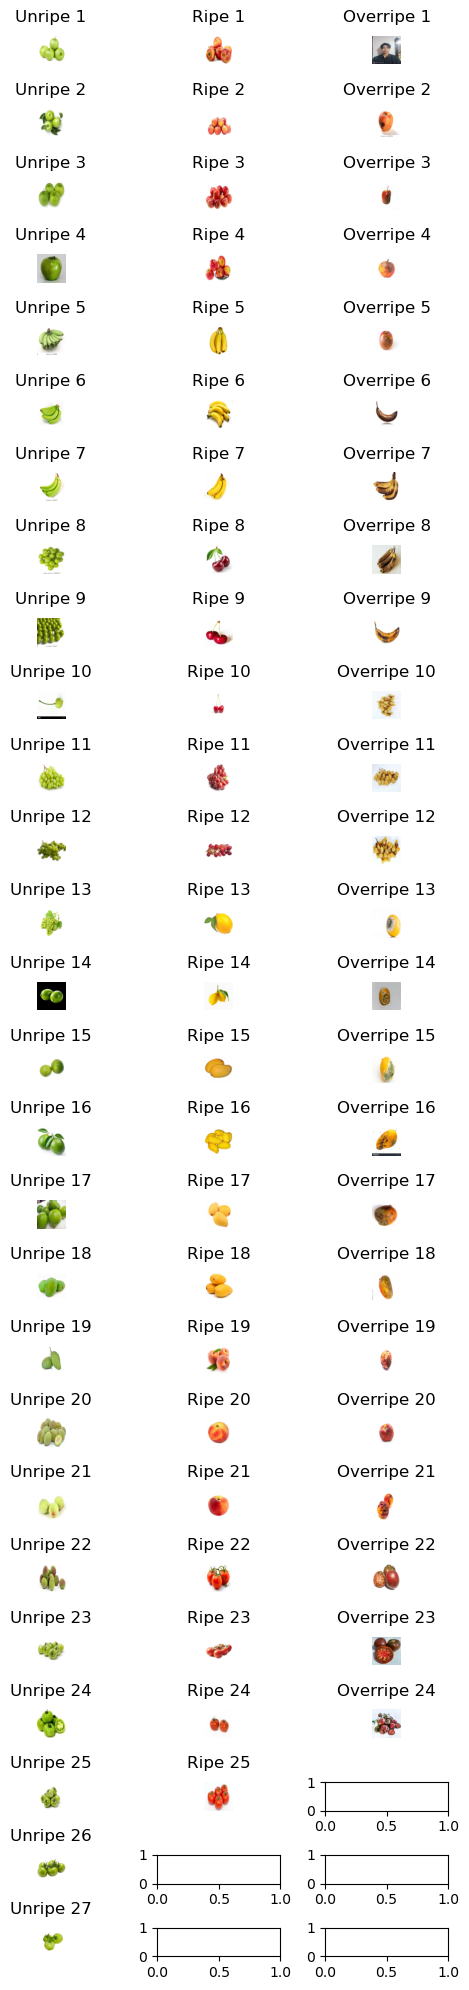

In [25]:
# Create a (count) x 3 grid to show the pictures
count = max(sum(fruit_df["ripeness"]=="ripe"), sum(fruit_df["ripeness"]=="overripe"), sum(fruit_df["ripeness"]=="unripe"))
fig, axs = plt.subplots(count, 3, figsize=(5, 20))
axs = axs.flatten()

# Go through all the pictures and display them
o = 0
u = 0
r = 0
for index, row in fruit_df.iterrows():
    img = cv2.imread(row["file_name"])
    img = resize_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    if(row["ripeness"] == "unripe"):
        ax = axs[o*3]
        ax.imshow(img)
        ax.set_title(f"Unripe {o+1}", pad=10)
        ax.axis('off')
        o += 1
    
    if(row["ripeness"] == "ripe"):
        ax = axs[r*3+1]
        ax.imshow(img)
        ax.set_title(f"Ripe {r+1}", pad=10)
        ax.axis('off')
        r += 1

    if(row["ripeness"] == "overripe"):
        ax = axs[u*3+2]
        ax.imshow(img)
        ax.set_title(f"Overripe {u+1}", pad=10)
        ax.axis('off')
        u += 1

# Print the orginal images
plt.tight_layout()
plt.show()

Format Images into 200 x 200

Apply Noise Reduction. High Filter or Low Filter, why choose that filter and why is it optimal

In [26]:
def edge_detection(img_name, alpha = 0.05):
    img = resize_image(cv2.imread(img_name),(600,600))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_noise_uni = np.random.uniform(0, 255, img.shape)

    noise_img = img+alpha*img_noise_uni
    gauss_blur = cv2.GaussianBlur(noise_img,(7,7),0)
    edge = np.abs(noise_img-gauss_blur)

    plt.imshow(edge, cmap='gray')
    return edge

def edge_removal(img_name):
    img = resize_image(cv2.imread(img_name), (600,600))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_noise_uni = np.random.uniform(0, 255, img.shape) # Shape manifests 

    noise_img = img+0.01*img_noise_uni
    gauss_blur = cv2.GaussianBlur(noise_img,(7,7),0)
    gauss_blur = cv2.normalize(gauss_blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


    edges = cv2.Canny(gauss_blur, threshold1=50, threshold2=50)

    kernel = np.ones((4, 4), np.uint8)
    thick_edges = cv2.dilate(edges, kernel, iterations=1)
    
    contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, color=255, thickness=cv2.FILLED)
    mask_3channel = cv2.merge([mask, mask, mask])

    result = cv2.bitwise_and(img, mask_3channel)
    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

def edge_removal_imginput(img):

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    img_noise_uni = np.random.uniform(0, 255, img.shape) # Shape manifests 

    noise_img = img+0.01*img_noise_uni
    gauss_blur = cv2.GaussianBlur(noise_img,(7,7),0)
    gauss_blur = cv2.normalize(gauss_blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


    edges = cv2.Canny(gauss_blur, threshold1=50, threshold2=50)

    kernel = np.ones((4, 4), np.uint8)
    thick_edges = cv2.dilate(edges, kernel, iterations=1)
    
    contours, _ = cv2.findContours(thick_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, color=255, thickness=cv2.FILLED)
    mask_3channel = cv2.merge([mask, mask, mask])

    result = cv2.bitwise_and(img, mask_3channel)
    gained_img_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    retval, gained_img_gray_mask = cv2.threshold(gained_img_gray, 0, 255, cv2.THRESH_BINARY)

    
    return result, gained_img_gray_mask
def edge_removal_urlinput(img_name):
    img = resize_image(cv2.imread(img_name), (600,600))    
    return edge_removal_img_input(img)



In [111]:
# ripe_sample = find_image_name("banana_overripe_3", overripe_img_names)
# ripe_sample

# ripe_sample = find_image_name("tomato_overripe_2", overripe_img_names)
# ripe_sample



# ripe_sample = find_image_name("lemon_unripe_1", unripe_img_names)
# ripe_sample


# ripe_sample = find_image_name("peach_ripe_1", ripe_img_names)
# ripe_sample


ripe_sample = find_image_name("mango_unripe_3", unripe_img_names)
ripe_sample

'images/mango_unripe_3.jpg'

Applying Adaptive Histogram equalization on the value channel makes color highlight more on the image. This would help during the use of edge removal as well

In [112]:
def apply_adaptive_his_equalization(url_img):
    img = resize_image(cv2.imread(url_img), (600,600))
          
    HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)               
    h, s, v= cv2.split(HSV)
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_v_apply = clahe.apply(v)
    equ_img = cv2.merge([h,s,clahe_v_apply])
    rgb_equ_img = cv2.cvtColor(equ_img, cv2.COLOR_HSV2RGB)   
    return rgb_equ_img

(<Axes: title={'center': 'Selection with Equalized Image'}>,
 Text(0.5, 1.0, 'Selection with Equalized Image'),
 (-0.5, 599.5, 599.5, -0.5))

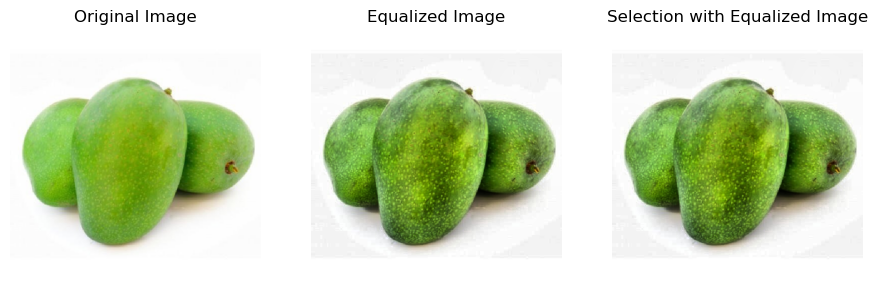

In [113]:
img = resize_image(cv2.imread(ripe_sample), (600,600))
org_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      
rgb_equ_img = apply_adaptive_his_equalization(ripe_sample)
gained_img, mask_channel_formgained = edge_removal_imginput(org_img)

plt.figure(figsize=(11,4))
plt.subplot(131),plt.imshow(org_img),plt.title('Original Image'),  plt.axis('off')
plt.subplot(132),plt.imshow(rgb_equ_img),plt.title('Equalized Image'),  plt.axis('off')
plt.subplot(133),plt.imshow(rgb_equ_img),plt.title('Selection with Equalized Image'),  plt.axis('off')

(<Axes: title={'center': 'Unripe Portion Image'}>,
 Text(0.5, 1.0, 'Unripe Portion Image'),
 (-0.5, 599.5, 599.5, -0.5))

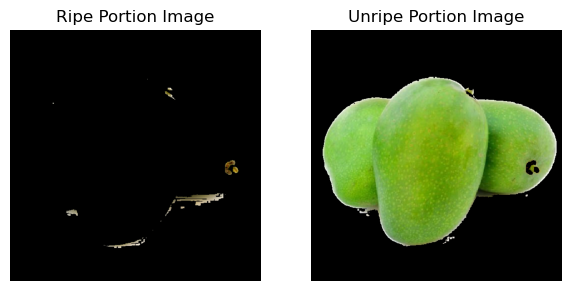

In [114]:
hsv = cv2.cvtColor(gained_img, cv2.COLOR_BGR2HSV)               # Convert to HSV color space
lr = np.array([92, 20, 70])
ur = np.array([125, 255, 255]) 
mask_in = cv2.inRange(hsv, lr, ur)
mask_out = cv2.bitwise_not(mask_in)
rgb_of_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
result_in_hsv = cv2.bitwise_and(hsv, hsv, mask=mask_in)
result_out_hsv = cv2.bitwise_and(hsv, hsv, mask=mask_out)
result_in = cv2.bitwise_and(rgb_of_hsv, rgb_of_hsv, mask=mask_in)
result_out = cv2.bitwise_and(rgb_of_hsv, rgb_of_hsv, mask=mask_out)
plt.figure(figsize=(11,4))
plt.subplot(131),plt.imshow(result_in),plt.title('Ripe Portion Image'),  plt.axis('off')
plt.subplot(132),plt.imshow(result_out),plt.title('Unripe Portion Image'),  plt.axis('off')

In [115]:
result_out_gray = cv2.cvtColor(result_out, cv2.COLOR_BGR2GRAY)

In [116]:
retval, gained_img_gray_mask = cv2.threshold(result_out_gray, 0, 255, cv2.THRESH_BINARY)

In [117]:
unripe_mask_val = np.sum(gained_img_gray_mask)

In [118]:
result_out_gray = cv2.cvtColor(result_in, cv2.COLOR_BGR2GRAY)
retval, gained_img_gray_mask = cv2.threshold(result_out_gray, 0, 255, cv2.THRESH_BINARY)
ripe_mask_val = np.sum(gained_img_gray_mask)

In [119]:
unripe_mask_val/ripe_mask_val

45.949737897008944

In [120]:
mask_new = cv2.bitwise_and(rgb_of_hsv, mask_out)
plt.imshow(mask, cmap="gray")

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


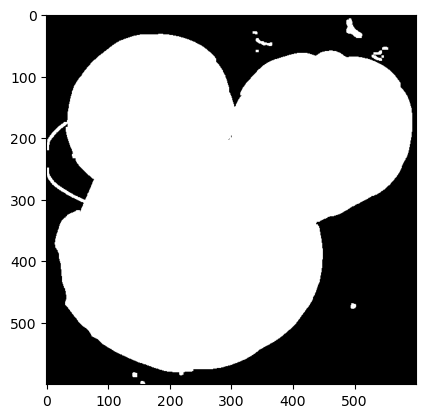

In [65]:
gained_img_gray = cv2.cvtColor(gained_img, cv2.COLOR_RGB2GRAY)
plt.imshow(mask_channel_formgained, cmap='gray')

(600, 600)


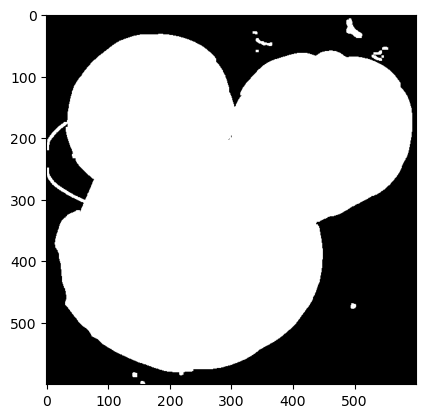

In [72]:
gained_img_gray = cv2.cvtColor(gained_img, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, gained_img_gray_mask = cv2.threshold(gained_img_gray, 0, 255, cv2.THRESH_BINARY)
plt.imshow(gained_img_gray_mask, cmap="gray")
print(gained_img_gray_mask.shape)

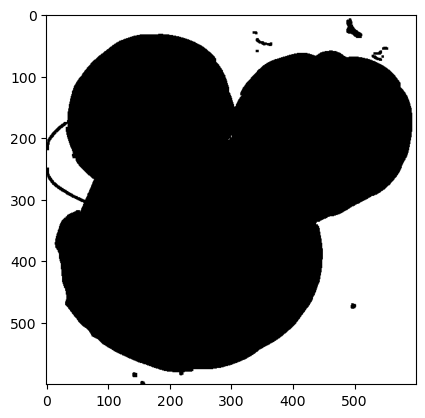

In [73]:
gained_img_invert = cv2.bitwise_not(mask_channel_formgained)
plt.imshow(gained_img_invert, cmap="gray")

Separate images into HSV images

Seggregate Fruits from being Ripe or not Ripe

In [176]:
# The Hue wheel ranges from 0 - reddish, 85- green, 170-blue
def is_fruit_ripe(img, thresh):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)               # Convert to HSV color space
    lr = np.array([95, 20, 70])
    ur = np.array([125, 255, 255]) 
    mask = cv2.inRange(hsv, lr, ur)
    mask_out = cv2.bitwise_not(mask_in)
    result_in = cv2.bitwise_and(hsv, hsv, mask=mask) # ripe portion
    result_out = cv2.bitwise_and(hsv, hsv, mask=mask_out) #uripe portion
    result_out_gray = cv2.cvtColor(result_out, cv2.COLOR_BGR2GRAY)
    retval, gained_img_gray_mask = cv2.threshold(result_out_gray, 0, 255, cv2.THRESH_BINARY)
    
    result_in_gray = cv2.cvtColor(result_in, cv2.COLOR_BGR2GRAY)
    retval, gained_img_ingray_mask = cv2.threshold(result_in_gray, 0, 255, cv2.THRESH_BINARY)
    
    x = np.sum(gained_img_gray_mask)
    y = np.sum(gained_img_ingray_mask)
    if(y==0):
        y = 1.0

    return  (x/y) > (thresh *0.01)
def ripe_mask(img, name):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)               # Convert to HSV color space
    lr = np.array([95, 20, 70])
    ur = np.array([125, 255, 255]) 
    mask_in = cv2.inRange(hsv, lr, ur)
    mask_out = cv2.bitwise_not(mask_in)
    result_in = cv2.bitwise_and(hsv, hsv, mask=mask_in) # ripe portion
    result_out = cv2.bitwise_and(hsv, hsv, mask=mask_out) #uripe portion
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))
    axs = axs.flatten()
    axs[0].set_title(f"{name}", pad=10)
    axs[0].imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
    axs[1].imshow(cv2.cvtColor(result_in, cv2.COLOR_HSV2BGR))
    axs[2].imshow(cv2.cvtColor(result_out, cv2.COLOR_HSV2BGR))
    plt.tight_layout()
    plt.show()

    return np.sum(mask_in)

def ripe_mask_no_plot(img, name):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)               # Convert to HSV color space
    lr = np.array([95, 20, 70])
    ur = np.array([125, 255, 255]) 
    mask_in = cv2.inRange(hsv, lr, ur)
    mask_out = cv2.bitwise_not(mask_in)
    result_in = cv2.bitwise_and(hsv, hsv, mask=mask_in) # ripe portion
    result_out = cv2.bitwise_and(hsv, hsv, mask=mask_out) #uripe portion
    return np.sum(mask_in)

In [177]:
def correct_labels(row):
    if row["ripeness"] == "overripe":
        return "ripe"
    else:
        return row["ripeness"]

def prediction_rate(row):
    return row["ripeness"] == row["predicted"]




In [186]:

def main_func_classify(thresh):
    predict = []
    mask = []
    print(thresh*0.01)
    for index, row in fruit_df.iterrows():
        name = row["file_name"]

        rgb_equ_img = apply_adaptive_his_equalization(name)
        gained_img, mask_channel_formgained = edge_removal_imginput(rgb_equ_img)
        
        mask.append(ripe_mask_no_plot(gained_img, name))
        if is_fruit_ripe(gained_img, thresh):
            predict.append("ripe")
        else:
            predict.append("unripe")
    
    predict = pd.DataFrame({'predicted': predict, 'mask': mask})
    fruit_df_pred = pd.concat([fruit_df, predict], axis=1)
    fruit_df_pred["ripeness"] = fruit_df_pred.apply(correct_labels, axis=1)
    fruit_df_pred["correct_prediction"] = fruit_df_pred.apply(prediction_rate, axis=1)
    
    accuracy = fruit_df_pred["correct_prediction"].mean()

    accuracy_list.append(accuracy)
    return predict, mask


In [ ]:
start = 10
end = 100
interval = 10

accuracy_list = []
numbers = np.arange(start, end+1, interval).tolist()

for n in numbers:
    predict, mask = main_func_classify(n)



0.1
0.2
0.3
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


In [195]:
len(numbers)

10

In [196]:
len(accuracy_list)

10

In [ ]:
dict={
       "Threshold": numbers,
        "rate": accuracy_list}

df = pd.DataFrame(dict)

In [198]:
df

,Threshold,rate
0,10,0.644737
1,20,0.644737
2,30,0.644737
3,40,0.644737
4,50,0.644737
5,60,0.644737
6,70,0.644737
7,80,0.644737
8,90,0.644737
9,100,0.644737


<Axes: xlabel='Threshold'>

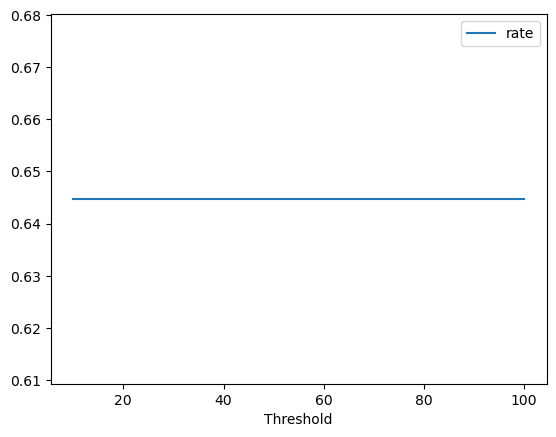

In [199]:
df.set_index('Threshold').plot()

In [200]:
fruit_df_pred.groupby(['fruit', 'ripeness'], as_index=False)['mask'].agg('mean')

NameError: name 'fruit_df_pred' is not defined

In [ ]:
fruit_df_pred[["fruit", "ripeness"]].agg('mean')

Get the Fourier Transform of the Images and Find the pattern. You can also choose not to apply fourier transform and find the the numerical deviation one fruit has to be considered ripe

FOR FUN: Make it into a python video screen capture. Identify ripe fruit or not